In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random

In [2]:
class Linear_regression():
    def __init__(self,m1,m2):
        self.m1=m1.to_list()
        self.m2=m2.to_list()
        pass
# Эта функция считает среднее значение

    def mean(m):
        summ=0
        for i in range(len(m)):
            summ += m[i]
        summ = summ/len(m)
        return summ   
    
# Эта функцция считает стандартное отлонение и дисперсию

    def stdev(m):
        disp=0
        mm = Linear_regression.mean(m)
        for i in range(len(m)):
            disp += (m[i] - mm)**2
        disp = disp/(len(m)-1)
        stdev = disp**(1/2)
        return stdev
         
# Эта функция считает корреляцию и ковариацию

    def corr(m1,m2):
        m1m = Linear_regression.mean(m1)
        m2m = Linear_regression.mean(m2)
        cov=0
        for i in range(len(y)):
            cov += (m2m - m2[i])*(m1m - m1[i])
        cov = cov/((len(m2)-1))
        cor = cov/(Linear_regression.stdev(m2) * Linear_regression.stdev(m1))
        return cor  
    
# Стандартная формула для построения регрессионной прямой вида y = b0 + b1 * x:
# b1 = (среднеквадротическое отклонение целевой переменной/среднеквадротическое отклонние признака) * их корреляция
# b0 = среднее значение целевой переменной/(среднее значение признака * b1)

    def standard_linear_regression_formula(self,m1='None',m2='None'):
        if m1 == 'None':
            m1=self.m1
        if m2 =='None':
            m2=self.m2
        cor = Linear_regression.corr(y,x)
        m1st = Linear_regression.stdev(m1)
        m2st = Linear_regression.stdev(m2)
        m1m = Linear_regression.mean(m1)
        m2m = Linear_regression.mean(m2)
        b1= (m2st / m1st) * cor
        b0 = m2m - m1m * b1
        return b0,b1
    
# Функкция потерь суммы квадратов ошшибок работает следующим образом:
# из значения целевой переменной вычитается предсказанное значение по конкртеному значению признака,
# суммируется по всей выборке и делится на (2 * объем выборки)
# L = (1/n)∑(y'-(b0 + b1 * x))^2

    def L(self,b0,b1):
        m1=self.m1
        m2=self.m2
        summ=0
        for i in range(len(m1)):
            summ= summ + (m2[i]-(b0 +b1 * m1[i]))**2
        summ = summ/(len(m1))
        return summ
    
# Эта функция считает коэффициенты для линейной регрессии методом градиентного спуска:
# берется производная по функции потерь: L = (y'-(b0 + b1 * x))^2
# частная производная по dL/db0 = -2 * (y' - b0 - b1 * x) * alpha1
# часиная производная по dL/db1 = -2b1 * (y' - b0 - b1 * x) * alpha2
# частные производные будут указывать на направление и скорость изменения функции, 
# если из переменных вычитать градиенты(частные производдные), функция будет стремится
# к одному из локальных миниумов функции потерь, чтобы найти глобальный миниум модель будет тестироватьсяна разных начальных
# данных коэффициентов, alpha1 и alpha2 служат ограничителями, чтобы градиент не перепрыгнул значение минимума
# за y' и x взяты их средние значения

    def grad_b0_b1(self,m1='None',m2='None'):
        if m1== 'None' or m2 == 'None':
            m1=self.m1
            m2=self.m2
        step = round((abs(max(m2)) - abs(min(m2)))/10)
        b0max=round(max(m2))
        mm1=Linear_regression.mean(m1)
        mm2=Linear_regression.mean(m2)
        alfa = 1/(1.5 * mm2)
        alfa1 = 1/(20 * mm2)
        L={}
        for j in range(-b0max,b0max,step):
            b0=j
            for k in range(-50,51,5):
                b1=k
                for iterator1 in range(30):
                    b0= b0 - (-2*(mm2 - b0 - b1*mm1))*alfa
                    b1= b1 - (-2*mm1)*(mm2 - b0 - b1*mm1)*alfa1
                L[Linear_regression.L(self,b0,b1)] = b0,b1    
        index = min(L)
        return L[index][0],L[index][1]
    
# Эта функция нужная для построения плоскости квадратов ошибок

    def func_square_error(self,b0,b1):
        m1=self.m1
        m2=self.m2
        b11=[]
        b00=[]
        L=[]
        for f in range(-25,26):
            b0x = b0 + (b0 /100)*f
            for i in range(-25,26):
                b1x = b1 + (b1/100)*i
                summ=0
                for j in range(len(m1)):
                    summ= summ + ((m2[j] - (b0x + m1[j] * b1x))**2)/(2* len(m2))
                #summ=summ/(2* len(m2))
                b11.append(b1x)
                b00.append(b0x)
                L.append(summ)
        return b00,b11,L

# Эта функция нужна чтобы вычислить такие точки, при которых регрессионная прямая на графике будет проходить через всю выборку

    def tochki(self,b0,b1):
        m1=self.m1
        m2=self.m2
        x1=min(m1)
        x2=max(m1)
        y1=b0 + b1 * x1
        y2=b0 + b1 * x2
        return [x1,x2],[y1,y2]
        
# Сумма ошибок по каждому из методов

    def sum_square_error(self):
        standart=Linear_regression.standard_linear_regression_formula(self)
        grad=Linear_regression.grad_b0_b1(self)
        
        error_standart=round(Linear_regression.L(self,standart[0],standart[1]))
        error_grad=round(Linear_regression.L(self,grad[0],grad[1]))

        print('Средняя сумма квадратов ошибок линейной регрессии по коэффициентам станадартной формулы составляет: ', error_standart)
        print('Средняя сумма квадратов ошибок линейной регрессии по по коэффициентам  градиентного спуска составляет: ', error_grad)
    
# График точек, входящих в выборку и лиейная регррессия по формуле стандартных отклонений
    
    def plot_standart(self):
        res=Linear_regression.standard_linear_regression_formula(self)
        tt=Linear_regression.tochki(self,res[0],res[1])
        sns.set()
        plt.scatter(self.m1,self.m2)
        plt.xlabel('Признак')
        plt.ylabel('Целевая переменная')
        plt.title('Линейная регрессия по стандартной формуле')
        plt.plot(tt[0],tt[1],c='red')

# График точек, входящих в выборку и линейная регрессия по методу стохастического градиентного спуска
        
        
    def plot_grad(self):
        m1=self.m1
        m2=self.m2
        
        b0=Linear_regression.grad_b0_b1(self)[0]
        b1=Linear_regression.grad_b0_b1(self)[1]
 
        tt=Linear_regression.tochki(self,b0,b1)
    
        sns.set()
        plt.scatter(m1,m2)
        plt.xlabel('Признак')
        plt.ylabel('Целевая переменная')
        plt.title('Линейная регрессия по методу градиентного спуска')
        plt.plot(tt[0],tt[1],c='red')
        
# 3мерный график с квадратами ошибок и точками коэффициентов на нем
        
    def plot_L_3d(self):
        fig = plt.figure(figsize=(14,17))
        
        standart = Linear_regression.standard_linear_regression_formula(self)
        standart_L = Linear_regression.L(self,standart[0],standart[1])
        
        grad = Linear_regression.grad_b0_b1(self)
        grad_L =  Linear_regression.L(self,grad[0],grad[1])
        
        b0_b1_L= Linear_regression.func_square_error(self,(standart[0] + grad[0])/2,(standart[1] + grad[1])/2)
        
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(b0_b1_L[0],b0_b1_L[1],b0_b1_L[2])
        ax.scatter([standart[0]],[standart[1]],[standart_L],c='green',s=50,label='b0,b1:Formula')
        ax.scatter([grad[0]],[grad[1]],[grad_L],c='red',s=50,label='b0,b1:Gradient')
        plt.legend(loc = 'upper center')
        plt.xlabel('b0')
        plt.ylabel('b1')
        plt.title('График функции потерь L(b0,b1)')

        plt.show()
        
# Функция разделяющая выборку на тестовую и тренировочную
        
    def train_test(self,train,test):
        m1=self.m1
        m2=self.m2
        m1test=[]
        m1train=[]
        m2test=[]
        m2train=[]
        x = train * len(m1)
        y = test * len(m1)
        n=[]
        for i in range(len(m1)):
            n.append(i)
        for i in range(round(x)-1):
            index=random.choice(n)
            m1train.append(m1[index])
            m2train.append(m2[index])
            n.remove(index)
        for i in range(round(y)-1):
            index=random.choice(n)
            m1test.append(m1[index])
            m2test.append(m2[index])
            n.remove(index) 
        return m1train,m2train,m1test,m2test
            
# Функция обучения
        
    def fit(self,m1train,m2train,method='None'):
        standart_b0 = Linear_regression.standard_linear_regression_formula(self,m1train,m2train)[0]
        standart_b1= Linear_regression.standard_linear_regression_formula(self,m1train,m2train)[1]
        if method == 'None' or method == 'Standart':
            return standart_b0,standart_b1
        
        grad_b0 = Linear_regression.grad_b0_b1(self,m1train,m2train)[0]
        grad_b1 = Linear_regression.grad_b0_b1(self,m1train,m2train)[1]
        if method == 'Gradient':
            return grad_b0,grad_b1
        
# Функция предсказания
        
    def predict(self,b0,b1,m1test):
        pred_m2=[]
        for i in range(len(m1test)):
            pred_m2.append(b0 + b1 * m1test[i])
        return pred_m2
    
# Функция, высчитывающая коэффициент детерминации
    
    def determ(self,m2test,pred_m2):
        ch=0
        zn=0
        meann = Linear_regression.mean(m2test)
        sr1=0
        sr2=0
        for i in range(len(m2test)):
            ch = ch + (m2test[i] - pred_m2[i])**2
            zn = zn + (m2test[i] - meann)**2
            sr1 += abs(m2test[i] - pred_m2[i])
            sr2 += abs(m2test[i] - meann)
        sr1 = sr1/len(m2test)
        sr2 = sr2/len(m2test)
        det = ch/zn
        print('Данная модель может описать ', round((1-det)*100,2), '% дисперсии данной выборки')

Модель будет протестирована на 2 датасетах: Рак молочной железы штата Висконсин; Цены на жилье в Бостоне.

In [3]:
from sklearn.datasets import load_breast_cancer
breast_dataset = load_breast_cancer()
breast = pd.DataFrame(breast_dataset.data, columns=breast_dataset.feature_names)
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Модель будет предсказывать площадь клетки(mean area) по периметру(pean perimetr)

In [4]:
x=breast['mean perimeter']
y=breast['mean area']
model=Linear_regression(x,y)

In [5]:
# Проверка даннных
print(breast['mean perimeter'].isnull().sum(),' пропущенных данных ',breast['mean area'].isnull().sum(), ' пропущенных данных ')

0  пропущенных данных  0  пропущенных данных 


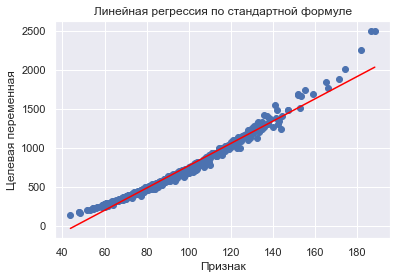

In [6]:
model.plot_standart()

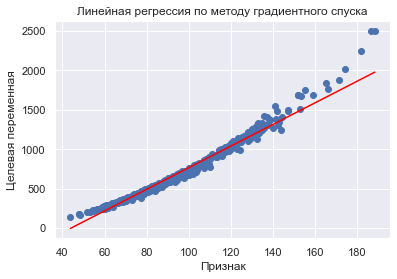

In [7]:
model.plot_grad()

In [8]:
model.sum_square_error()

Средняя сумма квадратов ошибок линейной регрессии по коэффициентам станадартной формулы составляет:  3314
Средняя сумма квадратов ошибок линейной регрессии по по коэффициентам  градиентного спуска составляет:  3527


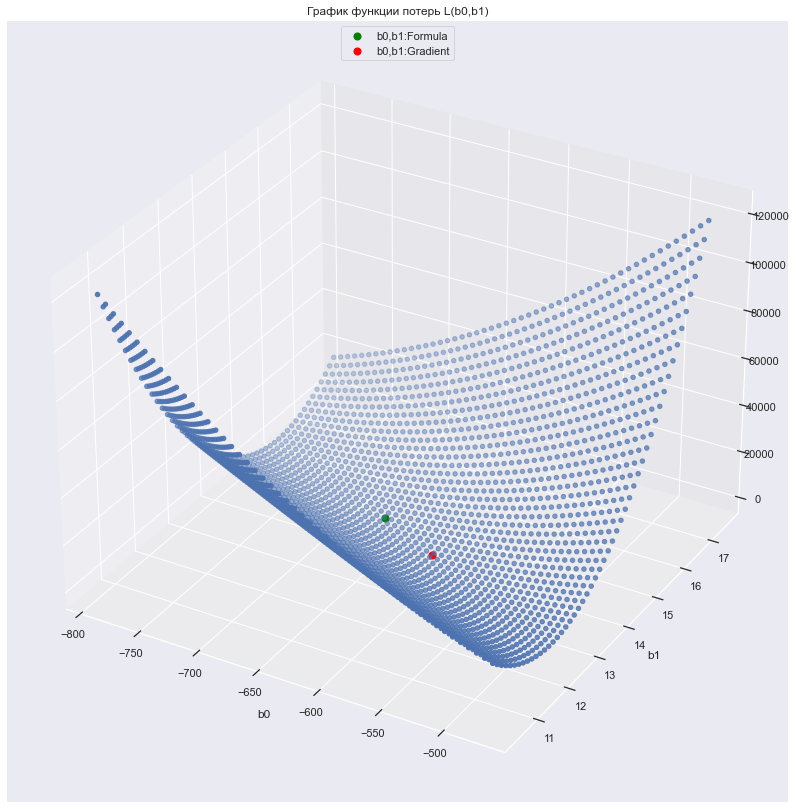

In [9]:
model.plot_L_3d()

In [10]:
trainx,trainy,testx,testy = model.train_test(0.7,0.3)

In [11]:
st=model.fit(trainx,trainy)
pred_st = model.predict(st[0],st[1],testx)
model.determ(testy,pred_st)

Данная модель может описать  98.04 % дисперсии данной выборки


In [12]:
gr = model.fit(trainx,trainy,method='Gradient')
pred_gr = model.predict(gr[0],gr[1],testx)
model.determ(testy,pred_gr)

Данная модель может описать  97.99 % дисперсии данной выборки


In [13]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

C:\Users\Tosha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Модель будет предсказывать среднюю стоимость дома(MEDV) по проценту более низкого статуса населения(LSTAT)

In [14]:
# Проверка даннных
print(boston['LSTAT'].isnull().sum(),' пропущенных данных ',boston['MEDV'].isnull().sum(),' пропущенных данных ')

0  пропущенных данных  0  пропущенных данных 


In [15]:
x = boston['LSTAT']
y = boston['MEDV']
model = Linear_regression(x,y)

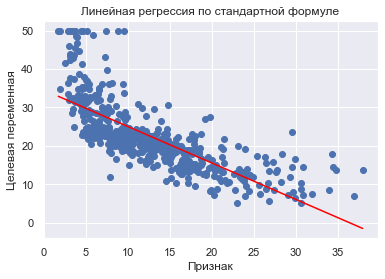

In [16]:
model.plot_standart()

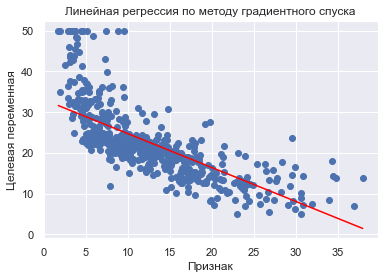

In [17]:
model.plot_grad()

In [18]:
model.sum_square_error()

Средняя сумма квадратов ошибок линейной регрессии по коэффициентам станадартной формулы составляет:  38
Средняя сумма квадратов ошибок линейной регрессии по по коэффициентам  градиентного спуска составляет:  39


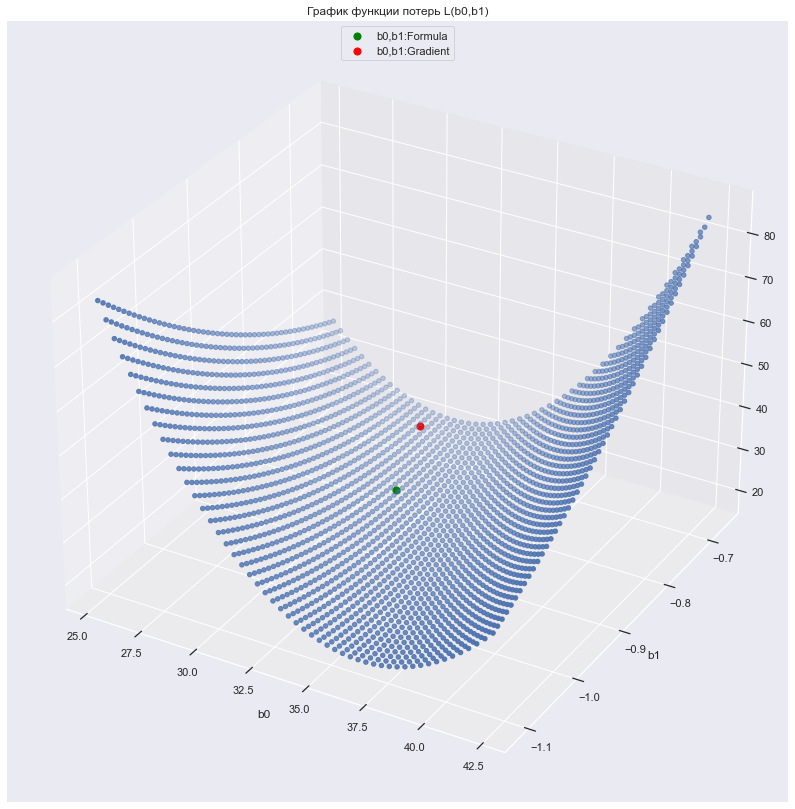

In [19]:
model.plot_L_3d()

In [20]:
trainx,trainy,testx,testy = model.train_test(0.7,0.3)

In [21]:
st=model.fit(trainx,trainy)
pred_st = model.predict(st[0],st[1],testx)
model.determ(testy,pred_st)

Данная модель может описать  58.44 % дисперсии данной выборки


In [22]:
gr = model.fit(trainx,trainy,method='Gradient')
pred_gr = model.predict(gr[0],gr[1],testx)
model.determ(testy,pred_gr)

Данная модель может описать  56.76 % дисперсии данной выборки
